In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import KFold

In [2]:
train = pd.read_csv("../input/30-days-of-ml/train.csv")
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


<AxesSubplot:>

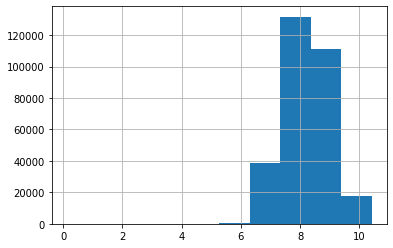

In [3]:
train.target.hist()

In [4]:
train['kfold']=-1
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,kfold
0,1,B,B,B,C,B,B,A,E,C,...,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634,-1
1,2,B,B,A,A,B,D,A,F,A,...,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233,-1
2,3,A,A,A,C,B,D,A,D,A,...,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351,-1
3,4,B,B,A,C,B,D,A,E,C,...,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253,-1
4,6,A,A,A,C,B,D,A,E,A,...,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260,-1


The split functions take the `train` dataframe and splits it into different training and validation sets for each fold. 

Return of `kfold.split(X=train)` is 2 items;  
1. `training indicies`
2. `validation indices`

and thus on enumerating `kfold.split(X=train)` we get 3 items in return;
1. `training indicies`
2. `validation indices`
3. `the fold no. [0,1,2,...]`

In [5]:
kf= KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_indicies, valid_indices) in enumerate(kf.split(X=train)):
    train.loc[valid_indices, "kfold"] = fold
    #print(fold, train_indicies, valid_indices) on executing this statement we get the train and validation set indices for the differnet folds

In [6]:
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,kfold
0,1,B,B,B,C,B,B,A,E,C,...,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634,0
1,2,B,B,A,A,B,D,A,F,A,...,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233,2
2,3,A,A,A,C,B,D,A,D,A,...,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351,4
3,4,B,B,A,C,B,D,A,E,C,...,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253,3
4,6,A,A,A,C,B,D,A,E,A,...,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260,1


In [8]:
train.shape

(300000, 27)

In [9]:
train.kfold.value_counts()

0    60000
1    60000
2    60000
3    60000
4    60000
Name: kfold, dtype: int64

<AxesSubplot:>

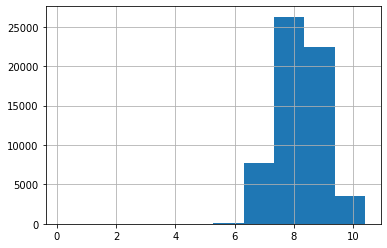

In [10]:
# We can use KFold on this dataset as the data distribution is similar for each fold
# try changing the fold no. to different values such as [0,1,2,3,4] 
train[train.kfold==0].target.hist()

In [11]:
train.to_csv("train_kfolds.csv",index=False)